# Get initial data

In [38]:
# imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.naive_bayes import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.discriminant_analysis import *

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import *
from sklearn.tree import DecisionTreeRegressor


In [39]:
# read the data
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Remove duplicates

In [40]:
# remove lines that have all values duplicated
red_wine.drop_duplicates(inplace=True, ignore_index=True)
white_wine.drop_duplicates(inplace=True, ignore_index=True)

# Add missing information and combine data

In [41]:
# add quality_label column
for wine_df in [red_wine, white_wine]:
    # we are creating a new column called "quality_label", we define a range and associate that range with a label
    wine_df['quality_label'] = wine_df['quality'].apply(lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high')

    # here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
    wine_df['quality_label'] = pd.Categorical(wine_df['quality_label'],
    categories=['low', 'medium', 'high'])

In [42]:
# create a df with all wines

# add color of wine as parameter
red_wine['color'] = 'red'
white_wine['color'] = 'white'

# combine the wine dfs
wine = pd.concat([red_wine, white_wine], ignore_index=True)

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
wine['color'] = pd.Categorical(wine['color'],
categories=['red', 'white'])

In [43]:
# use the rename method to change all columns names lowercase and add an underscore if they are made of 2 words
for wine_df in [wine, red_wine, white_wine]:
    wine_df.rename(str.lower, axis='columns', inplace=True)  # make the names lowercase
    wine_df.columns = wine_df.columns.str.replace(' ', '_')     # replace space with underscore in column names

# Prepare data for model training

In [44]:
len(red_wine['color'].unique())

1

In [45]:
# prepare wine data for model training
def prepare_wine_data_for_model_training(wine_df):

    # drop quality column
    wine_ml = wine_df.drop(['quality'], axis=1)

    # drop color column if there is only one column
    if len(wine_ml['color'].unique()) < 2:
        wine_ml = wine_ml.drop(['color'], axis=1)
    
    # one hot encode if there is multiple colors
    else:
        # create an instance of OneHotEncoder
        oh_enc = OneHotEncoder(categories=[['red','white']])

        # fit and transform the 'color' column
        encoded_color = oh_enc.fit_transform(wine_ml[['color']])

        # convert the one-hot encoded data to a DataFrame
        encoded_color_df = pd.DataFrame(encoded_color.toarray(), columns=oh_enc.get_feature_names_out(['color']))

        # concatenate the one-hot encoded DataFrame with 'wine_ml'
        wine_ml = pd.concat([wine_ml, encoded_color_df], axis=1)

        # drop the original 'color' column from 'wine_ml'
        wine_ml = wine_ml.drop('color', axis=1)

    # replace the quality labels with numerical values
    quality_codes = {'low' : 0, 'medium' : 1, 'high' : 2}
    wine_ml['quality_label'].replace(quality_codes, inplace=True)
    
    return wine_ml

In [46]:
red_wine_ml = prepare_wine_data_for_model_training(red_wine)
white_wine_ml = prepare_wine_data_for_model_training(white_wine)
wine_ml = prepare_wine_data_for_model_training(wine)



In [47]:
X = white_wine_ml.drop(['quality_label'], axis=1) # features
y = white_wine_ml['quality_label']  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# initialize the model
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train.ravel())

# make predictions on the test set
y_pred = forest.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7264
Confusion Matrix:
 [[188  90   0]
 [102 388   2]
 [  1  22   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66       278
           1       0.78      0.79      0.78       492
           2       0.00      0.00      0.00        23

    accuracy                           0.73       793
   macro avg       0.47      0.49      0.48       793
weighted avg       0.71      0.73      0.72       793



In [48]:
white_wine_ml['quality_label'].value_counts(normalize=True)

quality_label
1    0.625347
0    0.340318
2    0.034335
Name: proportion, dtype: float64

In [49]:
# TODO's:
# include feature scaling
# include feature importance


Feature: fixed_acidity, Score: 0.05349
Feature: volatile_acidity, Score: 0.11531
Feature: citric_acid, Score: 0.08154
Feature: residual_sugar, Score: 0.06650
Feature: chlorides, Score: 0.06115
Feature: free_sulfur_dioxide, Score: 0.09760
Feature: total_sulfur_dioxide, Score: 0.07331
Feature: density, Score: 0.06742
Feature: ph, Score: 0.07014
Feature: sulphates, Score: 0.07572
Feature: alcohol, Score: 0.23589
Feature: color_red, Score: 0.00115
Feature: color_white, Score: 0.00077


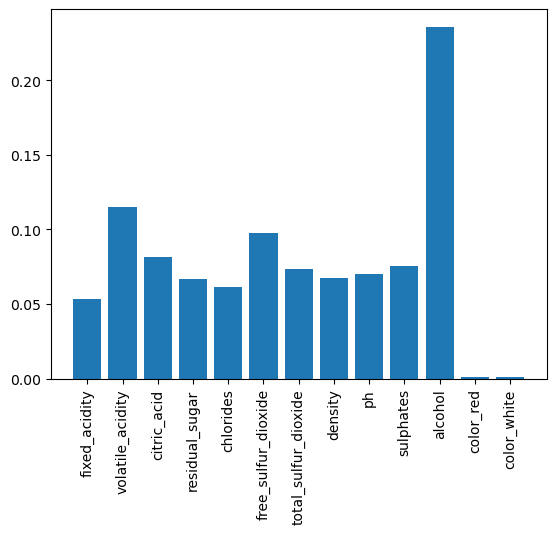

In [50]:
# decision tree for feature importance on a regression problem
# define dataset
X = wine_ml.drop(['quality_label'], axis=1) # features
y = wine_ml['quality_label']  # target variable

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# Get feature names
feature_names = X.columns

# Summarize feature importance
for feature, score in zip(feature_names, importance):
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot feature importance
plt.bar(feature_names, importance)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Feature: fixed_acidity, Score: 0.04127
Feature: volatile_acidity, Score: 0.10745
Feature: citric_acid, Score: 0.03253
Feature: residual_sugar, Score: 0.04311
Feature: chlorides, Score: 0.06257
Feature: free_sulfur_dioxide, Score: 0.06863
Feature: total_sulfur_dioxide, Score: 0.11382
Feature: density, Score: 0.08158
Feature: ph, Score: 0.09328
Feature: sulphates, Score: 0.11364
Feature: alcohol, Score: 0.24212


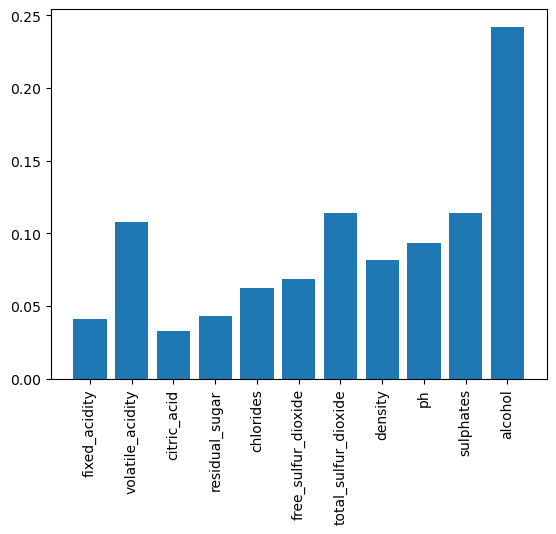

In [51]:
# decision tree for feature importance on a regression problem
# define dataset
X = red_wine_ml.drop(['quality_label'], axis=1) # features
y = red_wine_ml['quality_label']  # target variable

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
importance_red = importance

# Get feature names
feature_names = X.columns

# Summarize feature importance
for feature, score in zip(feature_names, importance):
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot feature importance
plt.bar(feature_names, importance)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Feature: fixed_acidity, Score: 0.06029
Feature: volatile_acidity, Score: 0.11181
Feature: citric_acid, Score: 0.05792
Feature: residual_sugar, Score: 0.05742
Feature: chlorides, Score: 0.07410
Feature: free_sulfur_dioxide, Score: 0.10159
Feature: total_sulfur_dioxide, Score: 0.08459
Feature: density, Score: 0.06747
Feature: ph, Score: 0.07733
Feature: sulphates, Score: 0.07129
Feature: alcohol, Score: 0.23618


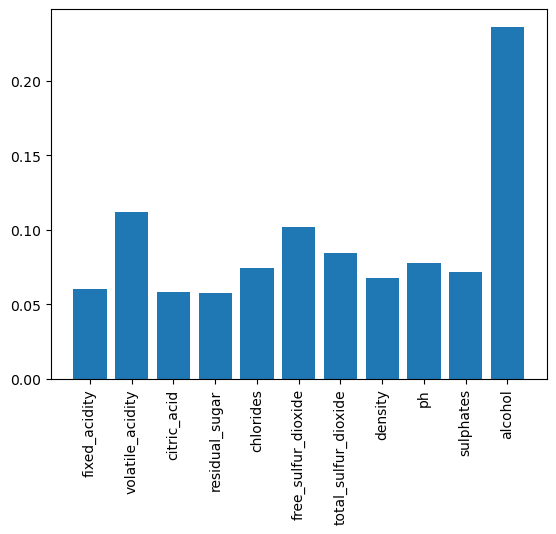

In [52]:
# decision tree for feature importance on a regression problem
# define dataset
X = white_wine_ml.drop(['quality_label'], axis=1) # features
y = white_wine_ml['quality_label']  # target variable

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
importance_white = importance

# Get feature names
feature_names = X.columns

# Summarize feature importance
for feature, score in zip(feature_names, importance):
    print('Feature: %s, Score: %.5f' % (feature, score))

# Plot feature importance
plt.bar(feature_names, importance)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()